<div style="background-color: #611327; color: white; padding: 10px; border: 2px solid #000000;">
  
# Load Data
    
</div>

<div style="background-color: whitesmoke; padding: 10px;border: 2px solid #000000;">
    
## Question 1 - Import the TIME_SERIES_MONTHLY from API https://www.alphavantage.co

 - you will need to use an API key from the attached list in the assignment folder
 - pick a Stock Ticker that is not Microsoft(MSFT)
 - Load the data into a New Pandas DataFrame
 - ... means you need to fill in with code

    
</div>   


In [90]:
import numpy as np
import pandas as pd
import requests
import json
import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt

In [91]:

API_KEY = 'FJJ46FMEUVTVQPCE'
symbol = 'IBM'

response = requests.get(f'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol={symbol}&apikey={API_KEY}')

if response.ok:
    monthly = response.json()
else:
    print(f'Request was not successful and returned code: {response.status_code}.')
    monthly = None

# hint: I suggest you transform the dataframe (the slides will be helpful)
df_monthly_ticker = pd.DataFrame(monthly['Monthly Time Series']).T

# Rename the index as 'date'
df_monthly_ticker.index.rename('date', inplace=True)

df_monthly_ticker = df_monthly_ticker.reset_index()

df_monthly_ticker

,date,1. open,2. high,3. low,4. close,5. volume
0,2024-11-14,207.7700,216.7000,205.5700,209.0100,33946945
1,2024-10-31,220.6300,237.3700,203.5100,206.7200,105624376
2,2024-09-30,201.9100,224.1500,199.3350,221.0800,83415811
3,2024-08-30,192.8100,202.1700,181.8100,202.1300,65453729
4,2024-07-31,173.4500,196.2600,173.3800,192.1400,81258646
...,...,...,...,...,...,...
295,2000-04-28,120.0000,128.0000,101.2500,111.5000,168464800
296,2000-03-31,102.0000,128.2500,99.5000,118.3700,194329000
297,2000-02-29,112.3700,119.7500,100.9400,102.7500,133524400
298,2000-01-31,112.4400,124.7500,109.6200,112.2500,175259600


In [73]:
#inspect your dataframe
df_monthly_ticker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       300 non-null    object
 1   1. open    300 non-null    object
 2   2. high    300 non-null    object
 3   3. low     300 non-null    object
 4   4. close   300 non-null    object
 5   5. volume  300 non-null    object
dtypes: object(6)
memory usage: 14.2+ KB


In [74]:
df_monthly_ticker.dtypes

date         object
1. open      object
2. high      object
3. low       object
4. close     object
5. volume    object
dtype: object

In [75]:
df_monthly_ticker.describe()

,date,1. open,2. high,3. low,4. close,5. volume
count,300,300,300,300,300,300
unique,300,288,297,294,298,300
top,2024-11-14,145.0000,86.4900,99.5000,115.1400,33946945
freq,1,3,2,2,2,1


In [76]:
df_monthly_ticker.isnull().sum()

date         0
1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

<div style="background-color: whitesmoke; padding: 10px;border: 2px solid #000000;">
    
## Question 2 - Import a secondary data source to enrich your primary data:

 - Using https://www.alphavantage.co/documentation/ find a secondary datasource which is by MONTH
 - It should NOT be Unemployment Rate! 
 - Try a different dataset from the Economic or Technical Indicator section of the API, update your URL with your choice.
 - Load the data into a New Pandas DataFrame
 - ... means you need to fill in with code
    
</div>   

In [77]:
import numpy as np #use for working with numeric/math functions
import pandas as pd
import requests
import json

API_KEY = 'FJJ46FMEUVTVQPCE'

response = requests.get(f'https://www.alphavantage.co/query?function=TREASURY_YIELD&apikey={API_KEY}')

if response.ok:
    monthly_treasury = response.json()
else:
    print(f'Request was not successful and returned code: {response.status_code}.')
    monthly_treasury = None

df_monthly_treasury_data = pd.DataFrame(monthly_treasury['data'])


In [78]:
# Print the results of your dataframe
df_monthly_treasury_data


,date,value
0,2024-10-01,4.1
1,2024-09-01,3.72
2,2024-08-01,3.87
3,2024-07-01,4.25
4,2024-06-01,4.31
...,...,...
854,1953-08-01,2.95
855,1953-07-01,2.93
856,1953-06-01,3.11
857,1953-05-01,3.05


In [79]:
#inspect your dataframe
df_monthly_treasury_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    859 non-null    object
 1   value   859 non-null    object
dtypes: object(2)
memory usage: 13.5+ KB


In [80]:
df_monthly_treasury_data.dtypes

date     object
value    object
dtype: object

In [81]:
df_monthly_treasury_data.describe()

,date,value
count,859,859
unique,859,546
top,2024-10-01,3.93
freq,1,7


In [82]:
df_monthly_treasury_data.isnull().sum()

date     0
value    0
dtype: int64

<div style="background-color: #611327; color: white; padding: 10px; border: 2px solid #000000;">
  
# JOIN Data
    
</div>

<div style="background-color: whitesmoke; padding: 10px;border: 2px solid #000000;">
    
## Question 3 - Merge/JOIN the two dataframes

 - Merge the two DataFrames together into a New DataFrame using INNER
 - Use the "date" field from each of the the DataFrames as your KEY/LINK 
 - You may need to align the date fields in your DataFrames to be the FIRST or LAST day of the month like in the slides.  You need them to be the same to JOIN.
 - ... means you need to fill in with code
    
</div>   

In [86]:
# Step 1: Convert the date column to datetime
df_monthly_ticker['date'] = pd.to_datetime(df_monthly_ticker['date'])
df_monthly_treasury_data['date'] = pd.to_datetime(df_monthly_treasury_data['date'])

# Step 2: Adjust the dates to the first day of the month
df_monthly_ticker['date'] = df_monthly_ticker['date'].values.astype('datetime64[M]')

# Rename the 'value' column to 'treasury_yield' in the dataframe
df_monthly_treasury_data = df_monthly_treasury_data.rename(columns={'value': 'treasury_yield'})

# Join
merged_df = pd.merge(df_monthly_treasury_data, df_monthly_ticker, on='date', how='inner')



In [87]:
# Print the results of your dataframe
merged_df

,date,treasury_yield,1. open,2. high,3. low,4. close,5. volume
0,2024-10-01,4.1,220.6300,237.3700,203.5100,206.7200,105624376
1,2024-09-01,3.72,201.9100,224.1500,199.3350,221.0800,83415811
2,2024-08-01,3.87,192.8100,202.1700,181.8100,202.1300,65453729
3,2024-07-01,4.25,173.4500,196.2600,173.3800,192.1400,81258646
4,2024-06-01,4.31,166.5400,178.4599,163.5300,172.9500,70706301
...,...,...,...,...,...,...,...
294,2000-04-01,5.99,120.0000,128.0000,101.2500,111.5000,168464800
295,2000-03-01,6.26,102.0000,128.2500,99.5000,118.3700,194329000
296,2000-02-01,6.52,112.3700,119.7500,100.9400,102.7500,133524400
297,2000-01-01,6.66,112.4400,124.7500,109.6200,112.2500,175259600


<div style="background-color: #611327; color: white; padding: 10px; border: 2px solid #000000;">
  
# Visualize Data
    
</div>

<div style="background-color: whitesmoke; padding: 10px;border: 2px solid #000000;">
    
## Question 4 - Using Matplotlib or Seaborn, create a chart of your choice using your merged_df DataFrame

 - you may want to go back and reference the PowerPoint and your Assignment for Lesson 1e
 - you may want to create a binned field or grouper field to make the chart more readable
 - ... means you need to fill in with code
</div>   

In [89]:

# Filter the DataFrame for the dates between 10/1/2022 and 9/1/2023
start_date = '2023-10-01'
end_date = '2024-10-01'
mask = (merged_df['date'] >= start_date) & (merged_df['date'] <= end_date)
filtered_df = merged_df.loc[mask]

# Create a pivot table with months as columns and 'Close', 'Volume', and 'Unemployment Rate' as rows
pivot_table = pd.pivot_table(
    filtered_df,
    values=['4. close', '5. volume', 'treasury_yield'],
    index=pd.Grouper(key='date', freq='M'),
    aggfunc={'4. close': 'mean', '5. volume': 'mean', 'treasury_yield': 'mean'}
)
# Format the 'Volume' column into millions with the abbreviation
pivot_table['5. volume'] = pivot_table['5. volume'].apply(lambda x: f"{x / 1_000_000:.2f}M")

# Rename the columns for clarity
pivot_table.columns = ['Close', 'Volume', 'Treasury Yield']

# Transpose the pivot table to get the desired format
pivot_table = pivot_table.transpose()

# Print the pivot table
pivot_table



date,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
Close,144.64,158.56,163.55,183.66,185.03,190.96,166.2,166.85,172.95,192.14,202.13,221.08,206.72
Volume,94.39M,78.46M,87.36M,128.12M,88.68M,99.92M,98.30M,78.62M,70.71M,81.26M,65.45M,83.42M,105.62M
Treasury Yield,4.8,4.5,4.02,4.06,4.21,4.21,4.54,4.48,4.31,4.25,3.87,3.72,4.1


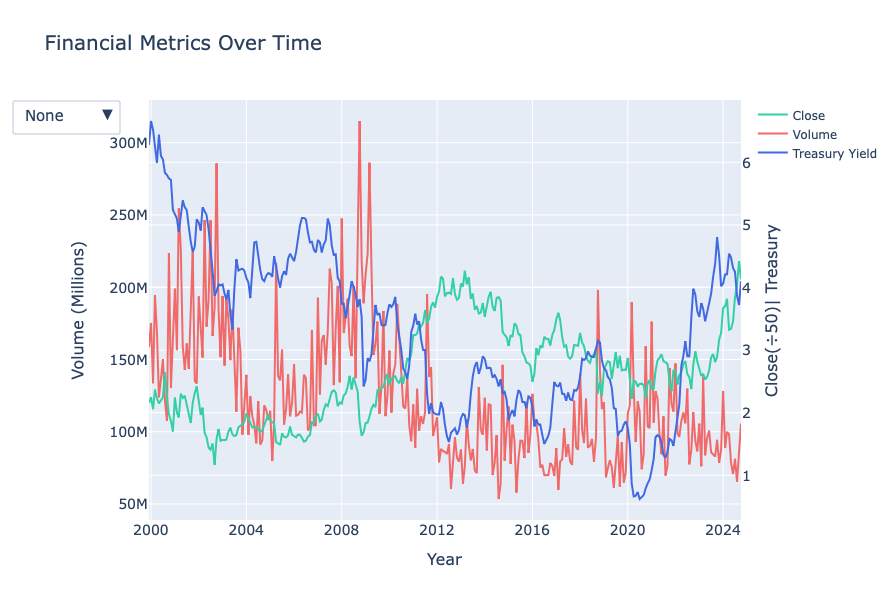

In [99]:

# Create the DataFrame
data = merged_df
df = pd.DataFrame(data)

# Renaming the coloumns in data for visulization purpose
df = df.rename(columns={'4. close': 'close', '5. volume': 'volume', 'treasury_yield': 'treasury_yield'}) 

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Covert object datatype to float for calculation purpose

df['close'] = df['close'].astype(float)
df['volume'] = df['volume'].astype(float)
df['treasury_yield'] = df['treasury_yield'].astype(float)

df['close'] = df['close']/50  # Scale close

# Initialize the figure
fig = go.Figure()

# Add traces for each metric, with y-axis placement
fig.add_trace(go.Scatter(x=df['date'], y=df['close'], name="Close", line=dict(color="#33CFA5"), yaxis="y2"))
fig.add_trace(go.Scatter(x=df['date'], y=[df['close'].mean()] * len(df), name="Close Avg", visible=False, line=dict(color="#33CFA5", dash="dash"), yaxis="y2"))

fig.add_trace(go.Scatter(x=df['date'], y=df['volume'], name="Volume", line=dict(color="#F06A6A"), yaxis="y"))
fig.add_trace(go.Scatter(x=df['date'], y=[df['volume'].mean()] * len(df), name="Volume Avg", visible=False, line=dict(color="#F06A6A", dash="dash"), yaxis="y"))

fig.add_trace(go.Scatter(x=df['date'], y=df['treasury_yield'], name="Treasury Yield", line=dict(color="#4169E1"), yaxis="y2"))
fig.add_trace(go.Scatter(x=df['date'], y=[df['treasury_yield'].mean()] * len(df), name="Treasury Avg", visible=False, line=dict(color="#4169E1", dash="dash"), yaxis="y2"))


# Add dropdown menu
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            font=dict(size=15),
            buttons=list([
                dict(label="None",
                     method="update",
                     args=[{"visible": [True, False, True, False, True, False]},
                           {"title": "Financial Metrics Over Time"}]),
                dict(label="Close",
                     method="update",
                     args=[{"visible": [True, True, False, False, False, False]},
                           {"title": "Close Prices Over Time"}]),
                dict(label="Volume",
                     method="update",
                     args=[{"visible": [False, False, True, True, False, False]},
                           {"title": "Volume Over Time"}]),
                dict(label="Treasury",
                     method="update",
                     args=[{"visible": [False, False, False, False, True, True]},
                           {"title": "Treasury Yield Over Time"}]),
                dict(label="All",
                     method="update",
                     args=[{"visible": [True, True, True, True, True, True]},
                           {"title": "Financial Metrics Over Time"}]),
            ]),
        )
    ]
)


# Create x-axis tick marks every 4 years
x_ticks = pd.date_range(start='2000-01-01', end='2024-12-31', freq='4AS')

# Update the layout to include these ticks
fig.update_layout(
    title_text="Financial Metrics Over Time",
    title=dict(font=dict(size=20)),
    xaxis=dict(
        title="Year",
        titlefont=dict(size=16),
        tickfont=dict(size=14),
        tickvals=x_ticks,  # Specify custom tick values
        ticktext=[str(year.year) for year in x_ticks]  # Use only the year as the label
    ),
    yaxis=dict(
        title="Volume (Millions)",
        titlefont=dict(size=16),
        tickfont=dict(size=14),
        side="left"  # Volume on the left side
    ),
    yaxis2=dict(
        title="Close(÷50)| Treasury",
        titlefont=dict(size=16),
        tickfont=dict(size=14),
        overlaying="y",  # Overlay with primary y-axis
        side="right"     # Close and Treasury on the right side
    ),
    width=1050,
    height=600
)

fig.show()


<div style="background-color: #611327; color: white; padding: 10px; border: 2px solid #000000;">
  
# Web Scraping
    
</div>

<div style="background-color: whitesmoke; padding: 10px;border: 2px solid #000000;">
    
## Question 5 - Web Scraping:

 - Using URL = https://www.boxofficemojo.com/brand/?ref_=bo_lnav_hm_shrt
 - Use Pandas read_html to load the tables from the website
 - Print your dataframe from the list
 - ... means you need to fill in with code
</div>   


In [94]:
import pandas as pd
import requests

# Fetch the web page
url = 'https://www.boxofficemojo.com/brand/?ref_=bo_lnav_hm_shrt'

response = requests.get(url)

# Use pandas to find the table on the web page and read it into a DataFrame
df_list = pd.read_html(url)
df_list

[                                  Brand            Total  Releases  \
 0                         Marvel Comics  $17,221,078,328        83   
 1                    Legendary Pictures   $7,020,120,489        64   
 2                                 Pixar   $7,007,141,198        33   
 3                             DC Comics   $6,810,209,207        65   
 4                             Lucasfilm   $6,521,161,399        44   
 5                  DreamWorks Animation   $6,082,005,827        49   
 6            Illumination Entertainment   $3,274,204,991        19   
 7                 Vertigo Entertainment   $3,155,524,780        49   
 8                             Bad Robot   $3,077,078,931        15   
 9         Walt Disney Animation Studios   $2,776,002,392        15   
 10                Blumhouse Productions   $2,516,991,927        52   
 11                               Hasbro   $2,079,485,824        17   
 12                          Nickelodeon   $1,930,746,182        26   
 13   

In [95]:
number_of_dataframe = len(df_list)
print(number_of_dataframe)

1


In [96]:
# df_list may contain multiple data frames, print out the first dataframe
df = df_list[0]

# Display the DataFrame
df



,Brand,Total,Releases,#1 Release,Lifetime Gross
0,Marvel Comics,"$17,221,078,328",83,Avengers: Endgame,"$858,373,000"
1,Legendary Pictures,"$7,020,120,489",64,Jurassic World,"$652,270,625"
2,Pixar,"$7,007,141,198",33,Inside Out 2,"$652,980,194"
3,DC Comics,"$6,810,209,207",65,The Dark Knight,"$533,345,358"
4,Lucasfilm,"$6,521,161,399",44,Star Wars: Episode VII - The Force Awakens,"$936,662,225"
5,DreamWorks Animation,"$6,082,005,827",49,Shrek 2,"$441,426,807"
6,Illumination Entertainment,"$3,274,204,991",19,Minions: The Rise of Gru,"$370,270,765"
7,Vertigo Entertainment,"$3,155,524,780",49,It,"$327,481,748"
8,Bad Robot,"$3,077,078,931",15,Star Wars: Episode VII - The Force Awakens,"$936,662,225"
9,Walt Disney Animation Studios,"$2,776,002,392",15,Frozen II,"$477,373,578"
